In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
matplotlib_axes_logger.setLevel('ERROR')

In [2]:
data = pd.read_csv(r"E:\Education\Data ML\Customer_Data.csv")

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [5]:
from seaborn import distplot as sb

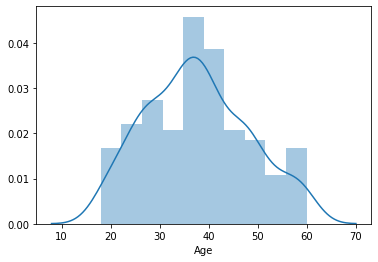

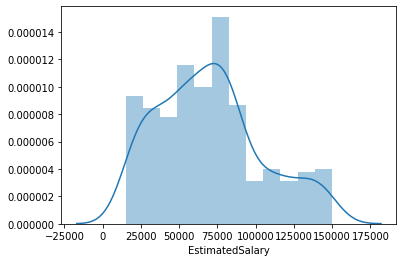

In [6]:
plt.subplots()
plt.show(sb(data["Age"]))
plt.show(sb(data["EstimatedSalary"]))

In [7]:
X = data[["Age","EstimatedSalary"]].values
Y = data["Purchased"].values

In [8]:
X.shape

(400, 2)

In [9]:
Y.shape

(400,)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.8)

In [11]:
X_train.shape

(320, 2)

In [12]:
X_test.shape

(80, 2)

In [13]:
SC = StandardScaler()

In [14]:
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [15]:
KNN = KNeighborsClassifier()

In [16]:
KNN.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
Y_pred = KNN.predict(X_test)

In [18]:
metrics.confusion_matrix(Y_test,Y_pred)

array([[46,  5],
       [ 7, 22]], dtype=int64)

In [19]:
metrics.accuracy_score(Y_test,Y_pred)*100

85.0

In [20]:
A = np.arange(start = X_train[:,0].min() - 1, stop = X_train[:,0].max() + 1, step = 0.01)
B = np.arange(start = X_train[:,1].min() - 1, stop = X_train[:,1].max() + 1, step = 0.01)

In [21]:
XX, YY = np.meshgrid(A,B)

In [22]:
input_arr = np.array([XX.ravel(),YY.ravel()]).T
labels = KNN.predict(input_arr).reshape(XX.shape)

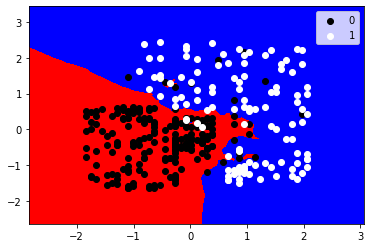

In [23]:
plt.contourf(XX,YY,labels,cmap = ListedColormap(("red","blue")))
for i,j in enumerate(np.unique(Y_train)):
    plt.scatter(X_train[Y_train == j,0],X_train[Y_train == j,1], c = ListedColormap(("black","white"))(i),label = i)
plt.legend()

In [24]:
def predict_output():
    age=int(input("Enter the age"))
    salary=int(input("Enter the salary"))
    
    X_new=np.array([[age],[salary]]).reshape(1,2)
    X_new=SC.transform(X_new)
    
    if KNN.predict(X_new)[0]==0:
        return "Will not purchase"
    else:
        return "Will purchase"

In [25]:
predict_output()

Enter the age41
Enter the salary545612


'Will purchase'